In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
from Libraries_functions import *
from tqdm import tqdm
from IPython.display import Audio 
import ipywidgets as widgets
from IPython.display import display
import glob

In [3]:
style = {'description_width': 'initial'}

select= widgets.Dropdown(
    options=[('noise', 0), ('voice', 1)],
    value=0,
    description='Select noise or voice for comparing:',
    style=style,
    layout={'width': 'max-content'}
)
make_pred= widgets.Dropdown(
    options=[('save', 0), ('not save', 1)],
    value=1,
    description='Select save or not save pred audios:',
    style=style,
    layout={'width': 'max-content'}
)

In [17]:
model = keras.models.load_model('./models/BestBUENO3996_noise_lr_0.001_btch_16_epch_50_loss_mae_opt_Adam.h5')

## Cargamos el valor de lo que vamos a predecir

In [18]:
ruta="../../Datasets/Test/mixed_sound"
class_r=os.listdir(ruta)
mix_real=[]
scaler_total=[]
for i,entry in enumerate(class_r):
        type_noise = ruta+'/'+entry
        mix_real.append(type_noise)

X_test=[]

for i in mix_real:
        signal_noise, sr_noise = librosa.load(i, sr=SAMPLE_RATE)
        mix_wav, mix_wav_phase = librosa.magphase(librosa.stft(signal_noise, n_fft=N_FFT, hop_length=HOP_LENGTH))
        mel_spec= librosa.feature.melspectrogram(S=mix_wav,sr=SAMPLE_RATE,n_fft=N_FFT,hop_length=HOP_LENGTH)
        mel_spec= librosa.power_to_db(mel_spec, ref=np.max)
        X_test.append(mel_spec)

for i in range(len(X_test)):
        pepe=MinMaxScaler()
        scaler_total.append(pepe)

for i in range(len(X_test)):
        X_test[i]=scaler_total[i].fit_transform(X_test[i])


In [19]:
np.shape(X_test)

(200, 128, 192)

In [20]:
X_test = np.reshape(X_test, (np.shape(X_test)[0], np.shape(X_test)[1],np.shape(X_test)[2],1))


## Visualización de lo predicho

In [21]:
np.shape(X_test)

(200, 128, 192, 1)

In [22]:

pred_outp=model.predict(X_test)
pred_outp=np.squeeze(pred_outp)


In [23]:
np.shape(pred_outp)


(200, 128, 192)

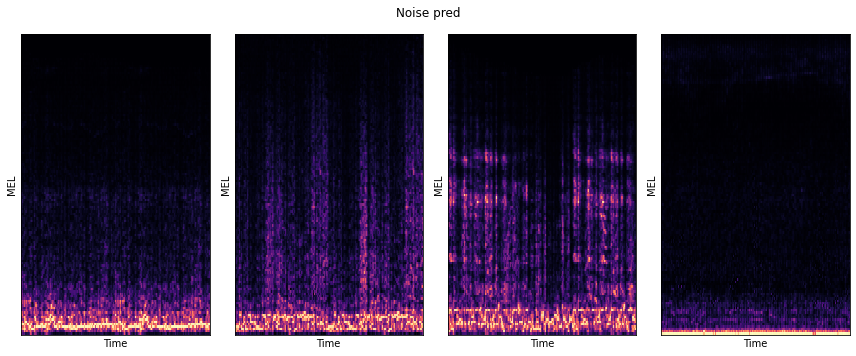

In [24]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots(1,4)
randomi=[]
for i in range(4):
    randomi.append(random.randint(0,len(pred_outp)))

librosa.display.specshow(pred_outp[randomi[0]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax1)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(pred_outp[randomi[1]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax2)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(pred_outp[randomi[2]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax3)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(pred_outp[randomi[3]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax4)## Nos permite visualizar como un mapa de calor

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Time')
    ax.set_ylabel('MEL')
fig.suptitle('Noise pred')
fig.set_size_inches(12,5)

fig.tight_layout()
plt.show()
##Cambiar nombre en cada ejecucion de audios distinta
fig.savefig('./results/Comparativa_audios/pred_mel_noise_largeTest.png')


## Visualización de lo real

In [25]:
display(select)
display(make_pred)

Dropdown(description='Select noise or voice for comparing:', layout=Layout(width='max-content'), options=(('no…

Dropdown(description='Select save or not save pred audios:', layout=Layout(width='max-content'), options=(('sa…

In [26]:
ruta_noise="../../Datasets/Test/noise/"
class_noise=os.listdir(ruta_noise)
ruta_voice="../../Datasets/Test/voice/"
class_voice=os.listdir(ruta_voice)
real=[]
if select.value==0:
    for i,entry in enumerate(class_noise):
        type_noise = ruta_noise+'/'+entry
        real.append(type_noise)
else:
    for i,entry in enumerate(class_voice):
        type_noise = ruta_voice+'/'+entry
        real.append(type_noise)
y_test=[]

for i in real:
    signal_noise, sr_noise = librosa.load(i, sr=SAMPLE_RATE)
    mix_wav, mix_wav_phase = librosa.magphase(librosa.stft(signal_noise, n_fft=N_FFT, hop_length=HOP_LENGTH))
    mel_spec= librosa.feature.melspectrogram(S=mix_wav,sr=SAMPLE_RATE,n_fft=N_FFT,hop_length=HOP_LENGTH)
    mel_spec= librosa.power_to_db(mel_spec, ref=np.max)
    y_test.append(mel_spec)

for i in range(len(X_test)):
        scalerY = MinMaxScaler()
        y_test[i]=scalerY.fit_transform(y_test[i])

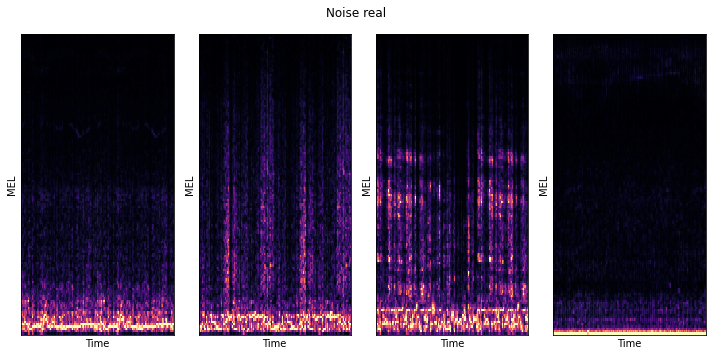

In [27]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots(1,4)

librosa.display.specshow(y_test[randomi[0]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax1)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(y_test[randomi[1]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax2)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(y_test[randomi[2]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax3)## Nos permite visualizar como un mapa de calor

librosa.display.specshow(y_test[randomi[3]], sr=SAMPLE_RATE, hop_length=HOP_LENGTH,ax = ax4)## Nos permite visualizar como un mapa de calor

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Time')
    ax.set_ylabel('MEL')
fig.suptitle('Noise real')
fig.set_size_inches(10,5)

fig.tight_layout()
plt.show()

##Cambiar nombre en cada ejecucion de audios distinta
fig.savefig('./results/Comparativa_audios/noise_mel_testLarge.png')

## Conversión a audio

In [28]:
AudioName = "./results/Convertido-mixed/convertido_mel"
if make_pred.value==0: # Archivo de Audio

    mixed_real=[]
    rutas_salida=[]
    for i in randomi:
        noise_real_signal, sr_mixed = librosa.load(mix_real[i], sr=SAMPLE_RATE)
        mixed_real.append(noise_real_signal)

    array_nums=list(range(len(mixed_real)))
    for i in tqdm (array_nums):
        print(mix_real[i])
        rutas_salida.append(convert_data(AudioName,pred_outp[randomi[i]],mixed_real[i],scaler_total[randomi[i]],randomi[i]))

    #leemos el archivo y escuchamos el archivo

  0%|          | 0/4 [00:00<?, ?it/s]

../../Datasets/Test/mixed_sound/mixed_sound1011.wav


 25%|██▌       | 1/4 [00:00<00:01,  1.60it/s]

../../Datasets/Test/mixed_sound/mixed_sound1025.wav


 50%|█████     | 2/4 [00:01<00:01,  1.65it/s]

../../Datasets/Test/mixed_sound/mixed_sound104.wav


 75%|███████▌  | 3/4 [00:01<00:00,  1.46it/s]

../../Datasets/Test/mixed_sound/mixed_sound1049.wav


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


In [29]:
rutas_salida

['./results/Convertido-mixed/convertido_mel_39.wav',
 './results/Convertido-mixed/convertido_mel_73.wav',
 './results/Convertido-mixed/convertido_mel_154.wav',
 './results/Convertido-mixed/convertido_mel_196.wav']